In [1]:
!pip install opencv-python mediapipe

     ---------------------------------------- 38.2/38.2 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 50.2/50.2 MB 3.6 MB/s eta 0:00:00
     ------------------------------------- 199.7/199.7 kB 11.8 MB/s eta 0:00:00
     ------------------------------------- 904.2/904.2 kB 19.0 MB/s eta 0:00:00
     ---------------------------------------- 44.9/44.9 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Successfully uninstalled protobuf-4.23.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [2]:
import cv2
import mediapipe as mp

In [32]:
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

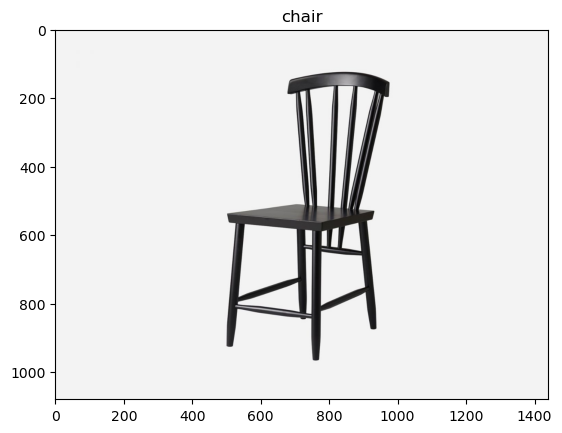

In [44]:
from matplotlib import pyplot as plt


image = cv2.imread('C:/Users/ozkon/Downloads/chair.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(gray)
plt.title('chair')
plt.show()

In [45]:
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            model_name='Chair') as objectron:
  
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

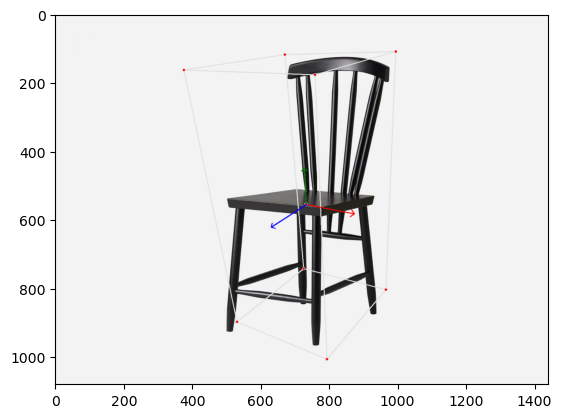

In [46]:
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()